Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


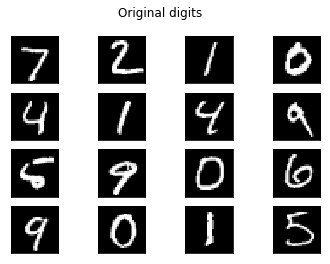

1st RBM finished
2nd RBM finished
3rd RBM finished
4th RBM finished
0.98 0.73 label: 7
0.13 0.40 label: 2
0.00 0.92 label: 1
0.99 0.16 label: 0
1.00 0.34 label: 4
0.00 0.92 label: 1
0.98 0.73 label: 4
0.98 0.68 label: 9
0.80 0.52 label: 5
0.92 0.80 label: 9
0.85 0.16 label: 0
0.85 0.16 label: 6
0.99 0.69 label: 9
0.99 0.16 label: 0
0.00 0.92 label: 1
0.13 0.40 label: 5


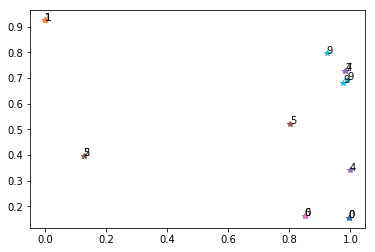

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("./mnist/data/", one_hot=False)

num_sample = 16
v=mnist.test.images[:num_sample,:]
label = mnist.test.labels[:num_sample]

fig1=plt.figure()
fig1.suptitle('Original digits')
for n in range(num_sample):
    subplot=fig1.add_subplot(4,4,n+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(v[n].reshape((28,28)), cmap=plt.cm.gray)
plt.show()

# 학습 파라미터
alpha = 0.05
num_iter = 500

# RBM 함수
def RBM(v0, h_dim, last_layer=False):
    N, v_dim = v0.shape
    h0 = np.zeros((N, h_dim))
    v1 = np.zeros((N, v_dim))
    h1 = np.zeros((N, h_dim))

    a = 0.5-np.random.rand(v_dim)
    b = 0.5-np.random.rand(h_dim)
    w = 0.5-np.random.rand(v_dim, h_dim)

    for k in range(num_iter):
        for n in range(N):
            for j in range(h_dim):
                de = np.inner(v0[n], w[:,j]) + b[j]
                if(1./(1.+np.exp(-de)) > np.random.rand()):
                    h0[n][j] = 1.
                else:
                    h0[n][j] = 0.
            
            for i in range(v_dim):
                de = np.inner(h0[n], w[i, :]) + a[i]
                if(1./(1.+np.exp(-de)) > np.random.rand()):
                    v1[n][i] = 1.
                else:
                    v1[n][i] = 0.
                        
            for j in range(h_dim):
                de = np.inner(v1[n], w[:,j]) + b[j]
                if(1./(1.+np.exp(-de)) > np.random.rand()):
                    h1[n][j] = 1.
                else:
                    h1[n][j] = 0.
                
        da = np.mean(v0 - v1, axis = 0) 
        db = np.mean(h0 - h1, axis = 0)
        dw = (np.matmul(v0.T, h0) - np.matmul(v1.T, h1))/N
    
        a += alpha*da
        b += alpha*db
        w += alpha*dw

    #학습된 파라미터를 이용해서 v에 대응하는 h를 얻는 과정
    if(not last_layer):
        for n in range(N):
            for j in range(h_dim):
                de = np.inner(v0[n], w[:,j]) + b[j]
                if(1./(1.+np.exp(-de)) > np.random.rand()):
                    h0[n][j] = 1.
                else:
                    h0[n][j] = 0.
                
    if(last_layer):
        for n in range(N):
            for j in range(h_dim):
                de = np.inner(v0[n], w[:,j]) + b[j]
                h0[n][j] = 1./(1.+np.exp(-de))
                
    return h0

h1=RBM(v, 200)
print('1st RBM finished')
h2=RBM(h1, 50)
print('2nd RBM finished')
h3=RBM(h2, 10)
print('3rd RBM finished')
h4=RBM(h3, 2, last_layer = True)
print('4th RBM finished')


colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9' ]
for x,y,l in zip(h4[:,0], h4[:,1], label):
    print('%.2f %.2f label: %d' % (x,y,l))
    plt.plot(x,y, '*', color=colors[l])
    plt.text(x,y, '%d' % l)
    